# NYC Measles Cases by Vaccination Status

- This Jupyter/Python notebook creates a bar chart of the 2018-2019 NYC Measles Cases by Vaccination Status and saves it as a PNG image.
- This notebook is part of the "measles" GitHub project: https://github.com/carlos-afonso/measles
- Author: Carlos Afonso: https://carlos-afonso.github.io
- Date: July 23, 2019

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the data as a dataframe
data_file = '../data/nyc_health_measles_cases_by_vaccination_status.csv'
df = pd.read_csv(data_file)
df

,Start Date,End Date,Unvaccinated,One Prior MMR,Two Prior MMR,Unknown MMR,Total
0,2018-09-01,2019-05-13,377,32,22,67,498
1,2018-09-01,2019-05-20,391,34,22,76,523
2,2018-09-01,2019-05-24,396,36,24,79,535
3,2018-09-01,2019-05-29,405,39,27,79,550
4,2018-09-01,2019-06-03,415,41,27,83,566
5,2018-09-01,2019-06-10,429,42,27,90,588
6,2018-09-01,2019-06-24,443,44,27,95,609
7,2018-09-01,2019-07-15,453,45,28,97,623
8,2018-09-01,2019-07-22,461,46,31,99,637


In [3]:
# Get the start date and transform it into a nicely formatted string
start_date_obj = datetime.strptime(df.values[-1, 0], '%Y-%m-%d').date()
start_date_str = start_date_obj.strftime('%b %d, %Y').replace(' 0', ' ')
start_date_str

'Sep 1, 2018'

In [4]:
# Get the end date and transform it into a nicely formatted string
end_date_obj = datetime.strptime(df.values[-1, 1], '%Y-%m-%d').date()
end_date_str = end_date_obj.strftime('%b %d, %Y').replace(' 0', ' ')
end_date_str

'Jul 22, 2019'

In [5]:
# Get the values to plot (we want the lastest values, which are in the last row)
vals = list(df.values[-1, 2:-1])
vals

[461, 46, 31, 99]

In [6]:
# Get the labesl corresponding to the values above
labels = list(df.columns[2:-1])
labels

['Unvaccinated', 'One Prior MMR', 'Two Prior MMR', 'Unknown MMR']

In [7]:
# Get the number of total cases
total_cases = int(df.iloc[-1, -1])
total_cases

637

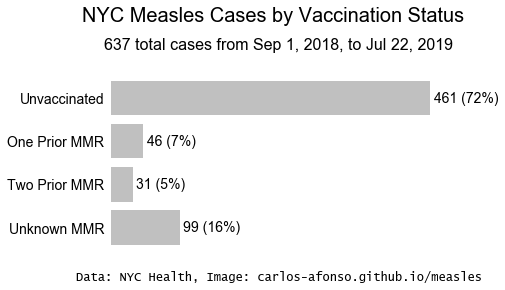

In [8]:
fn = 'Arial' # font name
fs = 14      # font size

fig = plt.figure()
fig.suptitle('NYC Measles Cases by Vaccination Status', fontname = fn, fontsize = fs + 6)

ax = fig.add_subplot(111)
fig.subplots_adjust(top = 0.75)
plt.title(
    str(total_cases) + ' total cases from ' + start_date_str + ', to ' + end_date_str + '\n', 
    fontname = fn, 
    fontsize = fs + 2
)

y_pos = range(len(vals))

# Create the bar chart
ax.barh(y_pos, vals, align = 'center', color = 'silver')

# Remove the x ticks (and labels)
ax.set_xticks([])

# Remove the y ticks
ax.yaxis.set_ticks_position('none')

# Set the y ticks and labels
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontname = fn, fontsize = fs)

# Invert the y axis
ax.invert_yaxis()

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Create the labes in front of the bars showing the number and percentage of cases
for i in ax.patches:
    ax.text(
        i.get_width() + 5, 
        i.get_y() + 0.4, 
        str(i.get_width()) + " (" + str(round(100 * int(i.get_width()) / total_cases)) + "%)", 
        fontname = fn, 
        fontsize = fs, 
        verticalalignment = 'center'
    )

# We don't need to label the x-axis, so we can use xlabel for an annotation about the Data/Image sources
plt.xlabel(
    '\nData: NYC Health, Image: carlos-afonso.github.io/measles', 
    fontname = 'Lucida Console', 
    fontsize = fs - 2
)

plt.show()

In [9]:
#fig.savefig('../images/nyc_measles_cases_by_vaccination_status_barchart_py.png', bbox_inches = 'tight', dpi = 150)
fig.savefig('../images/nyc_measles_cases_by_vaccination_status_barchart_py.svg', bbox_inches = 'tight')